In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import preprocessing
from itertools import groupby
from operator import itemgetter
import seaborn as sns
%matplotlib inline

In [3]:
#FUNCTIONS

def normalize(df):
    scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
    for col in df.columns:
        null_index = df[col].isnull()
        df.loc[~null_index, [col]] = scaler.fit_transform(df.loc[~null_index, [col]])
    return df

def count_consec(lst):
    consec = [1]
    for x, y in zip(lst, lst[1:]):
        if x == y - 1:
            consec[-1] += 1
        else:
            consec.append(1)
    return consec

#vals are the indices of nonzero
#consec are the lengths on nonzero sequences
def averages(df, site, vals, consec):
    avgs = []
    for length in consec:
        low = vals[0]
        high = low + length
        vals = vals[length:]
        avgs.append(year13[low:high][site].mean())
    return avgs
        

In [4]:
#READ IN DATA AND STORE IN DF

df = pd.read_csv('curtailment_and_prices.csv', index_col=0)
df = df.apply(pd.to_numeric)
df.index =df.index.map(lambda t: t[:13])
#if we want to normalize
# df = normalize(df)

#SEPARATE INTO YEARS 

year13 = df[0:8760]
year14 = df[8760:17520]
year15 = df[17520:26280]
year16 = df[26280:35064]
year17 = df[35064:43824]
year18 = df[43824:52584]

In [5]:
#TRANSMISSION LINES

lakeville = ["Calistoga", "Sonoma", "Unit 18", "Unit 13", "Unit 20"]
fulton = ["Unit 12", "Unit 14", "Unit 16", "Bear Canyon", "Unit 17"]
eagle_rock = ["Aidlin", "Unit 5&6", "Unit 7&8", "Unit 11"]
unaccounted = ['WFF']

#ALL SITES
sites = lakeville + fulton + eagle_rock + unaccounted


In [9]:
#SUM ALL CURTAILMENT
df_total = df.copy(deep=True)
df_total['sum'] = df_total[sites].sum(axis=1)
df_total = df_total['sum']
year13_total = df_total[0:8760]
year14_total = df_total[8760:17520]
year15_total = df_total[17520:26280]
year16_total = df_total[26280:35064]
year17_total = df_total[35064:43824]
year18_total = df_total[43824:52584]

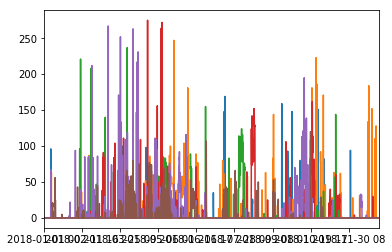

In [12]:
#stack the lines for all years in one plot (just the curtailment as a function of time)
#WAIT WHY IS THE AXIS ALL THE SAME DATE
year13_total.plot()
year14_total.plot()
year15_total.plot()
year16_total.plot()
year17_total.plot()
year18_total.plot()
plt.show()

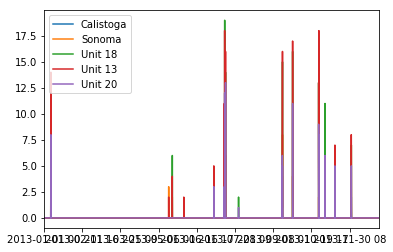

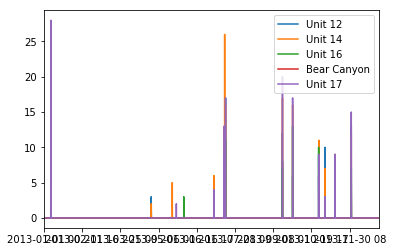

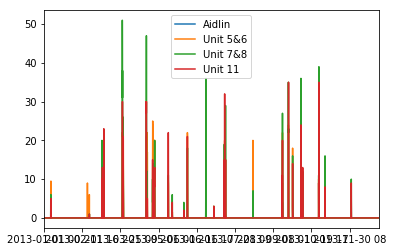

In [33]:
#CURTAILMENT PER TRANSMISSION LINE

#observation: peaks tend to occur at the same time for same tranmission line
#investigate spearman correlation here

for col in lakeville:
    year13[col].plot()
plt.legend()
plt.show()

for col in fulton:
    year13[col].plot()
plt.legend()
plt.show()

for col in eagle_rock:
    year13[col].plot()
plt.legend()
plt.show()


In [91]:
#CORRELATION
year13[['Calistoga', 'Sonoma', 'Unit 18', 'Unit 13', 'Unit 20']].corr()

,Calistoga,Sonoma,Unit 18,Unit 13,Unit 20
Calistoga,1.000000,0.672969,0.448830,0.511648,0.499328
Sonoma,0.672969,1.000000,0.801146,0.869345,0.842624
Unit 18,0.448830,0.801146,1.000000,0.891872,0.872791
Unit 13,0.511648,0.869345,0.891872,1.000000,0.936989
Unit 20,0.499328,0.842624,0.872791,0.936989,1.000000


In [92]:
#year13.describe()

print("Average curtailment for 2014")
year14.mean()

Average curtailment for 2014


Aidlin              0.000000
Bear Canyon         0.000685
Calistoga           0.006849
Sonoma              0.023402
Unit 11             0.849087
Unit 12             0.073288
Unit 13             0.059932
Unit 14             0.088014
Unit 16             0.072260
Unit 17             0.011073
Unit 18             0.115525
Unit 20             0.046233
Unit 5&6            2.082991
Unit 7&8            1.982648
WFF                 0.000228
Unit16_price       44.527116
Aidlin_price       41.898089
Sonoma_price       44.065639
Unit11_price       40.691854
Unit20_price       44.323431
Unit13_price       44.193040
Unit14_price       44.386336
Unit12_price       44.399620
Unit18_price       44.393324
Unit17_price       44.723649
Calistoga_price    44.331375
Unit5_6_price      40.741439
Unit7_8_price      40.660720
dtype: float64

In [45]:
print("Max curtailment for 2013")
year13.max()

Max curtailment for 2013


Aidlin               0.0000
Bear Canyon          0.0000
Calistoga            4.5000
Sonoma               8.0000
Unit 11             35.0000
Unit 12             17.0000
Unit 13             18.0000
Unit 14             26.0000
Unit 16             13.0000
Unit 17             28.0000
Unit 18             19.0000
Unit 20             13.0000
Unit 5&6            25.0000
Unit 7&8            51.0000
WFF                  1.0000
Unit16_price       865.2053
Aidlin_price       862.6984
Sonoma_price       855.0292
Unit11_price       848.4640
Unit20_price       859.9429
Unit13_price       857.2627
Unit14_price       862.8275
Unit12_price       863.3120
Unit18_price       861.3638
Unit17_price       869.5916
Calistoga_price    859.9258
Unit5_6_price      847.7620
Unit7_8_price      847.6599
dtype: float64

In [109]:
#PLOT CURTAILMENT LENGTH DISTRIBUTION: 2013

#look at valley fire and curtailment (sep12-18 2015) --> sonoma, westford flat, unit 16, 18, 20
#(oct8-21 2017)

curtail_lengths = []
avgs = []
for site in sites:
    vals = year15[site].nonzero()[0]
    if len(vals) == 0:
        continue
    consec = count_consec(vals)
    curtail_lengths += consec
    avg = averages(year15, site, vals, consec)
    avgs += avg

/Users/nandinik/anaconda3/lib/python3.4/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/nandinik/anaconda3/lib/python3.4/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Frequency')

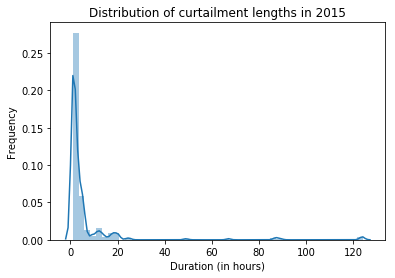

In [110]:
sns.distplot(sorted(curtail_lengths))
plt.title("Distribution of curtailment lengths in 2015")
plt.xlabel("Duration (in hours)")
plt.ylabel("Frequency")

In [87]:
unq,ids,count = np.unique(curtail_lengths,return_inverse=True,return_counts=True)
out = np.column_stack((unq,np.bincount(ids,avgs)/count))
out

array([[ 1.        ,  5.56349206],
       [ 2.        ,  6.62931034],
       [ 3.        , 10.03125   ],
       [ 4.        , 16.125     ],
       [ 5.        , 10.17142857],
       [ 6.        ,  7.04166667],
       [ 7.        ,  7.6122449 ],
       [ 8.        , 15.9375    ],
       [ 9.        , 17.55555556],
       [10.        , 12.        ],
       [11.        , 18.88311688],
       [12.        , 17.11111111],
       [13.        , 16.66666667],
       [14.        ,  8.28571429],
       [18.        , 26.22222222],
       [19.        , 19.52631579],
       [21.        , 11.34920635]])